In [ ]:

l = [1,2,3,4,5,6,7,8,9]
w = [9,8,7,6,5,4,3,2,1]
fish_data = [[l,w] for l,w in zip(l,w)]#zip함수는 나열된 리스트에서 원소를 하나씩 뽑는다
print(fish_data)
fish_target = [1]*5+ [0]*4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn =KNeighborsClassifier()
kn.fit (fish_data,fish_target)
kn.score(fish_data,fish_target)#알아서 predict를 수행해서 예측점수를 알려준다 여기서는 score할 것과 fit에 들어간 값들이 일치하므로 100점이다

#classifier할 개체를 0과1로 나누어 놓고 fit and score 한 것이다.
#fish_target 은 classify 할 객체
#fish_data는 fish의 정보

In [ ]:
#이제 훈련세트와 트레이닝 세트로 나누어서 진짜로 모델이 어느정도 예측을 하는지 측정한다
#data_slicing
train_input = fish_data[:5]
test_input = fish_data[5:9]

train_output = fish_target[:5]
test_output = fish_target[5:9]

kn.fit (train_input,train_output)
kn.score(test_input,test_output)

In [ ]:
#numpy의 사용
import numpy as np

input_array = np.array(fish_data)
output_array = np.array(fish_target)

print(input_array)
print(input_array.shape)# shape 는 샘플수, 특성수 로 나온다
print(input_array.sum)

In [ ]:
np.random.seed(42)
index = np.arange(8)# 0부터9번 인덱스까지 증가하는 배열을 만든다
np.random.shuffle(index)# 그 배열을 무작위로 섞는다

train_input = input_array[index[:4]] #shuffle 된 숫자로 인덱스
test_input = input_array[index[5:9]] #shuffle 된 숫자로 인덱스
# 여기서 중요한건 input_array로는 이렇게 넣을 수 있다는 것
# fish_data는 이렇게 못 나눈다

In [ ]:
#튜플은 리스트와 비슷한데 원소에 순서가 있지만 수정할 수 없다.
fish_data = np.column_stack((l,w)) # ㅣ과 w를 각각 행으로 쭉 세우고 열로 더헤서 만든 데이터
print(fish_data)

In [ ]:
fish_target = np.concatenate((np.ones(4),np.zeros(5)))

print(fish_data)
# 아래는 그냥 해본것이고 data 와 target을 나누어야 하므로 0과1을 data에 더하지는 않는다

In [ ]:
#train test를 쉽게 하는 방법
from sklearn.model_selection import train_test_split
train,test,train_output,test_output = train_test_split(fish_data,fish_target,test_size=0.2,random_state=42)
#새로운 데이터인 [3,4]에 가장 가까운 이웃과의 거리와 인덱스 뽑기
distance,index = kn.kneighbors([[3,4]]) 
#산점도 그래프 설정
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])#train 한 데이터들의 데이터가 2d 형태이므로 하나씩 한축에 대입
plt.scatter(3,4, marker='^')
plt.xlim((0,10))
plt.ylim((0,10))
plt.xlabel('l')
plt.ylabel('w')


In [ ]:
#array 다루기 
data = np.array([1,2,3,4,5,6,7,8,9])
print(data)
data = data.reshape(3,3)
print(data.shape)

In [ ]:
#결정계수 r^2
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
from sklearn.metrics import mean_absolute_error
test_pred = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_pred)#타깃값과 예측값의 오차를 평균화 한 것
print(mae)

#metrics 활용

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_output)
lr.coef_#종종계수 - w1
lr.intercept_#가중치 - bias

In [ ]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))
lr = LinearRegression()
lr.fit(train_poly, train_output)
lr.coef_#[w1,w2]
lr.intercept_#bias


In [ ]:
#csv 파일은 ,(콤마) 로 구분된 pandas 에서 사용하는  데이터프레임에 적합한 텍스트파일이다.
import pandas as pd
df = pd.read_csv('adsada')
data = df.to_numpy()#numpy로 변환


In [ ]:
#사이킷런은 데이터 변환기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(train_input)#세롭게 만들 특성조합을 설정
print(poly.transform(train_input))#실제로 데이터를 변환
poly.get_feature_names()


In [ ]:
#각 열마다의 특징들이 갖는 값들의 크기가 다르기때문에 regularization하기 전에 
#normalization을 하여 특징값들의 특성을 정규화 해준다
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

In [ ]:
import pandas as pd

data = pd.read_csv("PUBLIC.csv")
print(data.head())
print(pd.uique(data['species']))#species 열을 타깃으로 잡고 데이터 출력

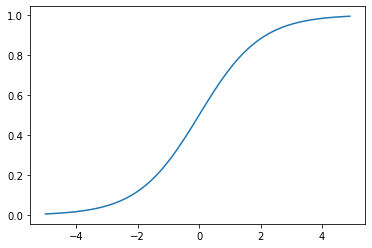

In [42]:
#로지스틱 회귀는 분류하는 모델이다
#시그모이드 함수, 소프트맥스 함수로 0과1사이로 만든다
z = np.arange(-5,5,0.1)
phi = 1/ (1+np.exp(-z))
plt.plot(z,phi)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train,test)

In [ ]:
#로지스틱회귀모델로 경사하강법을 적용할 수 있다
#그 이유는 로지스틱 회귀의 loss function이 연속적이므로 미분이 가능하다
#이진분류할 때는 정답데이터가 0과 1일때이고 확률이 0부터 1 사이에 나오므로
# -(정답데이터(0or1) - 확률값) 으로 정해도 무방하다, 다만 0이 정답인데 0.2의 확률로 나오면 잘 맞춘것이므로 0.8로 바꾸고 -취하여 -0.8로 쓴다
#-> loss function이 클수록 0에 가깝고 작을수록-1에 가까워진다
#이를 타깃에 따라 0이 타깃 일때는 -log(예측확률) , 1일때는 -log(1-예측확률)이다.
#크로스 엔트로피 함수는 다중분류모델에서 쓰는 loss function이다
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_input,train_output)
#한번더 실행
sc.partial_fit(train_input,train_output)
print(sc.score(train_input,train_output))
print(sc.score(test_input,test_output))

In [ ]:
#이번에는 partial_fit만 할 거이므로 partial에 모든 data랑 class를 추가해줘야한다.
train_score =[]
test_score=[]
classes = np.unique(train_target)

for i in range(0,300):
    sc.partial_fit(train_input,train_output,classes =classes)
    train_score.append(sc.score(train_input,train_output))
    test_score.append(sc.score(test_input,test_output))
plt.plot(train_score)
plt.plot(test_score)
plt.show()

#에포크마다 달라지는 score를 비교해가면서 train score가 증가하다가 감소하는 그부분까지 epoch 설정하는 것이 옳다
#그 부분이 지나가면 overfitting 이라 본다
#모델을 생성할때 tol이라는 부분도 넣는데 이건 얼마점수 일정 에포크동안 tol 값이상으로 성장하지 못하면 에포크를 멈추는 것이다.
